# Regressão logística

- Modelo de regressão linear 
$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_d X_d = \beta^T x $$
onde $x^T = [1, x_1, \cdots, x_d]$, e $\beta^T$ é um vetor linha.


## Probabilidade para caso de duas classes 

Para classes 1 e 0 temos: 
$$ p (y = 0| X) \text{ e } p(y = 1|X) $$

## Função logística (sigmoid)
A função sigmoid pertence ao intevalo $[0, 1]$
$$h(z) = \frac{e^z}{1 + e^z}$$


$$p(y = 1|x) = \frac{e^{\beta^T x}}{1 + e^{\beta^T x}}$$

$$p(y = 0|x) = 1 - p(y = 1|x) = \frac{1}{1 + e^{\beta^T x}}$$

Chamando $p = p(y = 1|x)$ temos $p(y = 0|x) = 1 - p$, podemos então escrever
esse modelo como processo de Bernoulli

$$P(x = k) = p^k (1 - p)^{1 - k}, k = 0, 1$$
Para ajustar o modelo da regressão logistica em uma função mais compacta é 
utilizada a função de verossimilhança com a probabilidade escrita como processo de Bernoulli, então 

$$L(\beta) = \prod_{i = 1}^{N} p^{y_i}(1 - p)^{1 - y_i}$$

Fazemos o logaritmo dessa função, pois assim podemos simplifica-la com mais facilidade

$$\log(L(\beta)) = \log \left(\prod_{i = 1}^{N} p^{y_i}(1 - p)^{1 - y_i}\right)$$

$$\log(L(\beta)) = \underbrace{\sum_{i = 1}^{N} y_i \log(p) + (1 - y_i) \  log(1 - p)}_{\text{ Cost function}}$$

Maximizando a função de verossimilhança minimizamos a função custo.


$$\log(L(\beta)) = \sum_{i = 1}^{N} y_i \log(p) + (1-y_i)\log(1-p)$$

$$\log(L(\beta)) = \sum_{i = 1}^{N} \log \left(\frac{e^{\beta^T x_i}}{1 + e^{\beta^T x_i}}\right) + \sum_{i = 1}^{N} \log \left( \frac{1}{1 + e^{\beta^T x_i}} \right)$$

$$ \log(L(\beta)) = \sum_{i = 1}^{N} \log e^{\beta^T x_i} - \log (1 + e^{\beta^T x_i}) + \sum_{i = 1}^{N} \log(1) - \log \left( 1 + e^{\beta^T x_i} \right) $$

$$ \log(L(\beta)) = \sum_{i = 1}^{N} \beta^T x_i - \log\left(1 + e^{\beta^T x_i} \right) - \sum_{i = 1}^{N} \log\left(1 + e^{\beta^T x_i}\right) $$

Máximizando a função:
$$ \frac{\partial}{\partial \beta} \log(L(\beta)) = \sum_{i = 1}^{N} x_i - \frac{1}{1 + e^{\beta^T x_i}} x_i e^{\beta^T x_i} - \sum_{i = 1}^{N} \frac{1}{1 + e^{\beta^T x_i}} x_i e^{\beta^T x_i}  $$ 

$$\boxed{ \frac{\partial}{\partial \beta} \log(L(\beta)) = \sum_{i = 1}^{N} x_i \left(  y_i - \frac{e^{\beta^T x_i}}{1 + e^{\beta^T x_i}}\right) = 0 } $$

Usamos algum método numérido para minimizar o erro por exeplo **Newton-Raphson**.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn import linear_model
from scipy.special import expit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

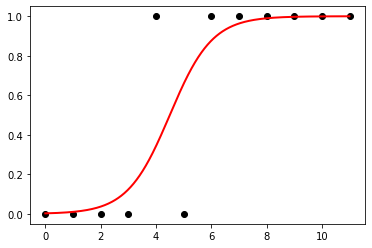

In [9]:
X = np.arange(12).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1])
plt.plot(X, y, 'ko')

model = linear_model.LogisticRegression(C = 1e5)
model.fit(X, y)

# curva mais suave -> xx * model.coef_...
xx = np.arange(min(X), max(X), 0.01)
loss = expit(xx * model.coef_ + model.intercept_).ravel()
plt.plot(xx, loss, color = 'red', linewidth = 2)

plt.show()

In [10]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Introdução à Ciência de Dados/data/Vehicle.csv')

data = data.dropna(axis = 'rows')

classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)

attributes = list(data.columns)
data = data.to_numpy()

In [11]:
nrow, ncol = data.shape
y = data[:, -1]
X = data[:, 0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [12]:
p = 0.2
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 1533)

In [13]:
model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Acurácia: ', model.score(x_test, y_test))

Acurácia:  0.7823529411764706
